# What is PCA?

PCA = Principal Component Analysis

It is an Unsupervised Machine Learning – Dimensionality Reduction technique.

👉 PCA transforms high-dimensional data into fewer dimensions while keeping maximum information.

🎯 Main Goals

Reduce number of features

Remove noise / correlation

Avoid overfitting

Improve model speed

Visualize high-dimensional data

🔷 Simple Real-Life Example

Imagine your dataset has:

Height

Weight

BMI

Body Fat %

These features are related (correlated).
Instead of 4 features, PCA can convert them into:

PC1 → Overall body size

PC2 → Body shape difference

So we reduce features but keep meaning.

# How PCA Works (Simple Intuition)
Step 1️⃣ — Standardize Data

Because features may have different scales

Step 2️⃣ — Compute Covariance

Find relationships between features

Step 3️⃣ — Compute Eigenvalues & Eigenvectors

Eigenvalues → how important each direction is, They tell how important each direction is.
If a direction spreads data a lot → it has big eigenvalue
If it spreads very little → small eigenvalue

Eigenvectors → directions of new axes (principal components), They tell which direction the data spreads the most.

Eigenvectors → directions (principal components)

Eigenvalues → importance of each direction

Step 4️⃣ — Sort Components by Importance

PC1 → highest variance
PC2 → second highest variance
...

Step 5️⃣ — Form New Dataset

Use top k principal components

# When to Use PCA?
* Use PCA when:
* ✔ Too many features
* ✔ Features are correlated
* ✔ Want visualization
* ✔ Want faster ML model
* ✔ Want noise reduction

* Don't use PCA when:
* ❌ Data highly interpretable (like finance reports)
* ❌ When features must remain original meaning

# PCA in Machine Learning Pipeline

* 1️⃣ Load dataset
* 2️⃣ Clean data
* 3️⃣ Scale data
* 4️⃣ Apply PCA
* 5️⃣ Use reduced data for ML model

In [1]:
import pandas as pd
import numpy as np
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt

In [2]:
from sklearn.datasets import load_iris
data = load_iris()

df = pd.DataFrame(data.data, columns=data.feature_names)
df.head()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm)
0,5.1,3.5,1.4,0.2
1,4.9,3.0,1.4,0.2
2,4.7,3.2,1.3,0.2
3,4.6,3.1,1.5,0.2
4,5.0,3.6,1.4,0.2


In [8]:
df.shape

(150, 4)

In [9]:
df.isnull().sum()

sepal length (cm)    0
sepal width (cm)     0
petal length (cm)    0
petal width (cm)     0
dtype: int64

In [10]:
scaler = StandardScaler()
scaled_data = scaler.fit_transform(df)

In [11]:
pca = PCA(n_components=2)
pca_data = pca.fit_transform(scaled_data)

In [5]:
pca_df = pd.DataFrame(data=pca_data, columns=['PC1','PC2'])
pca_df.head()

,PC1,PC2
0,-2.264703,0.480027
1,-2.080961,-0.674134
2,-2.364229,-0.341908
3,-2.299384,-0.597395
4,-2.389842,0.646835


In [6]:
print("Variance explained by components:")
print(pca.explained_variance_ratio_)
print("Total variance preserved:", sum(pca.explained_variance_ratio_))

Variance explained by components:
[0.72962445 0.22850762]
Total variance preserved: 0.9581320720000164


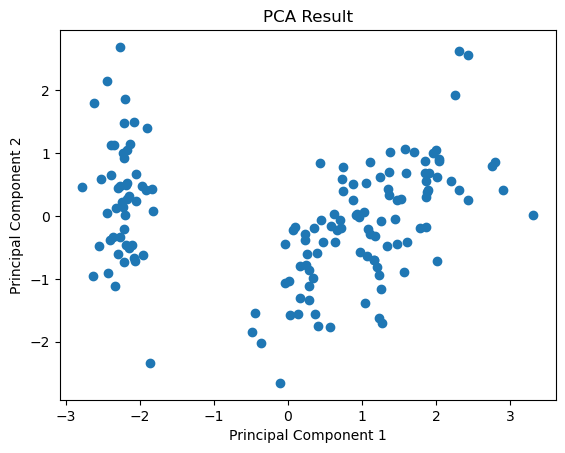

In [7]:
plt.scatter(pca_df['PC1'], pca_df['PC2'])
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.title('PCA Result')
plt.show()